In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))



Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


The above bipartite matrix maps the exitiance of a realtionship between a member of the Davis Club and an activity. A value of 1 indicates that the member participates in the activity, while a value of 0 indicates no participation.

In [24]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
E = bipartite.projected_graph(G, clubs)

# Create a list of tuples: (woman, degree)
data = [(w, W.degree(w)) for w in women]
clubsdata = [(c, E.degree(c)) for c in clubs]

# Convert to DataFrame
df_degree = pd.DataFrame(data, columns=["Member", "Friends"])
c_df_degree = pd.DataFrame(clubsdata, columns=["Event", "Connected_Events"])
# Sort by number of friends (descending)
df_degree = df_degree.sort_values(by="Friends", ascending=False).reset_index(drop=True)
c_df_degree = c_df_degree.sort_values(by="Connected_Events", ascending=False).reset_index(drop=True)
# Display
print("Women by number of friends")
print(df_degree)



Women by number of friends
               Member  Friends
0    Evelyn Jefferson       17
1         Ruth DeSand       17
2         Helen Lloyd       17
3        Nora Fayette       17
4     Sylvia Avondale       17
5     Verne Sanderson       17
6    Theresa Anderson       17
7    Pearl Oglethorpe       16
8         Myra Liddel       16
9    Katherina Rogers       16
10  Dorothy Murchison       16
11        Eleanor Nye       15
12   Frances Anderson       15
13   Laura Mandeville       15
14      Brenda Rogers       15
15    Olivia Carleton       12
16        Flora Price       12
17   Charlotte McDowd       11


In [25]:
print("\nClubs by number of members")
print(c_df_degree)



Clubs by number of members
   Event  Connected_Events
0     E6                13
1     E7                13
2     E8                13
3     E9                13
4     E1                 8
5     E2                 8
6     E3                 8
7     E4                 8
8     E5                 8
9    E10                 8
10   E11                 8
11   E12                 8
12   E13                 8
13   E14                 8


In the above code, I used the NetworkX example and stored the women’s information in a pandas DataFrame, allowing for easier data manipulation and further analysis if needed. Here, we show the degree to which each woman is connected to others through shared activities. Women with a degree of 17 are connected to every other woman in the network, since there are 18 women in total. We see that Ms. McDowd is the least connected member of the network, with 11 friends. In this context, women become “friends” by attending the same events. This demonstrates that we successfully projected the bipartite graph onto a unipartite network, showing direct connections between women based on shared event participation.

In [26]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
# Create a list of tuples: (woman, weighted degree)
W = bipartite.weighted_projected_graph(G, women)
data_weighted = [(w, W.degree(w, weight='weight')) for w in women]

# Convert to DataFrame
df_weighted = pd.DataFrame(data_weighted, columns=["Member", "Total_Friend_Meetings"])

# Sort by total shared meetings (descending)
df_weighted = df_weighted.sort_values(by="Total_Friend_Meetings", ascending=False).reset_index(drop=True)

# Display the DataFrame
print(df_weighted)





               Member  Total_Friend_Meetings
0    Theresa Anderson                     57
1    Evelyn Jefferson                     50
2       Brenda Rogers                     46
3     Sylvia Avondale                     46
4    Laura Mandeville                     45
5        Nora Fayette                     43
6         Ruth DeSand                     40
7     Verne Sanderson                     38
8    Katherina Rogers                     37
9         Eleanor Nye                     36
10        Helen Lloyd                     34
11        Myra Liddel                     33
12   Frances Anderson                     32
13   Pearl Oglethorpe                     31
14   Charlotte McDowd                     24
15  Dorothy Murchison                     24
16    Olivia Carleton                     14
17        Flora Price                     14


Above we now look at the total number of shared meetings for a woman with all other women in the network.
Theresa Anderson has the most shared meetings with 57,  while Flora, Olivia made the least connections accross all meetings with 14

In the visualizations we take a look at the bipartite graph of the Davis Club. The First plot shows the orginal enttire network without lable. The second plot shows the different node types with their lables. Allowing us to viusualize how a woman connects to events.

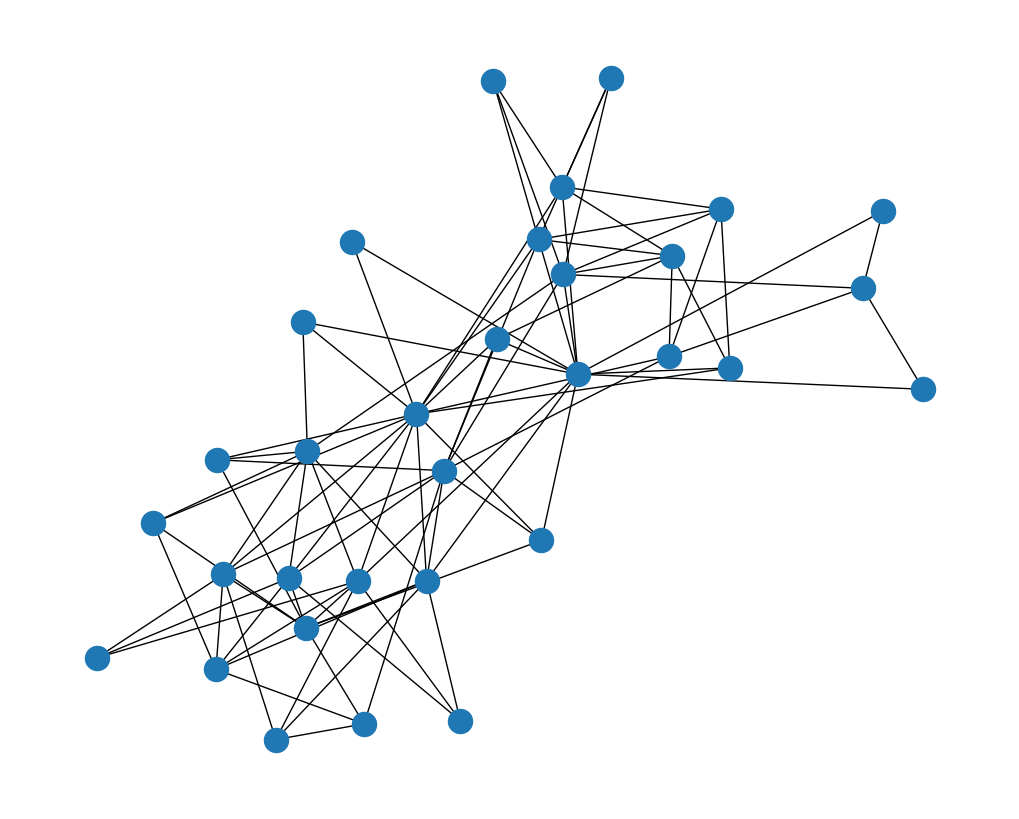

In [27]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

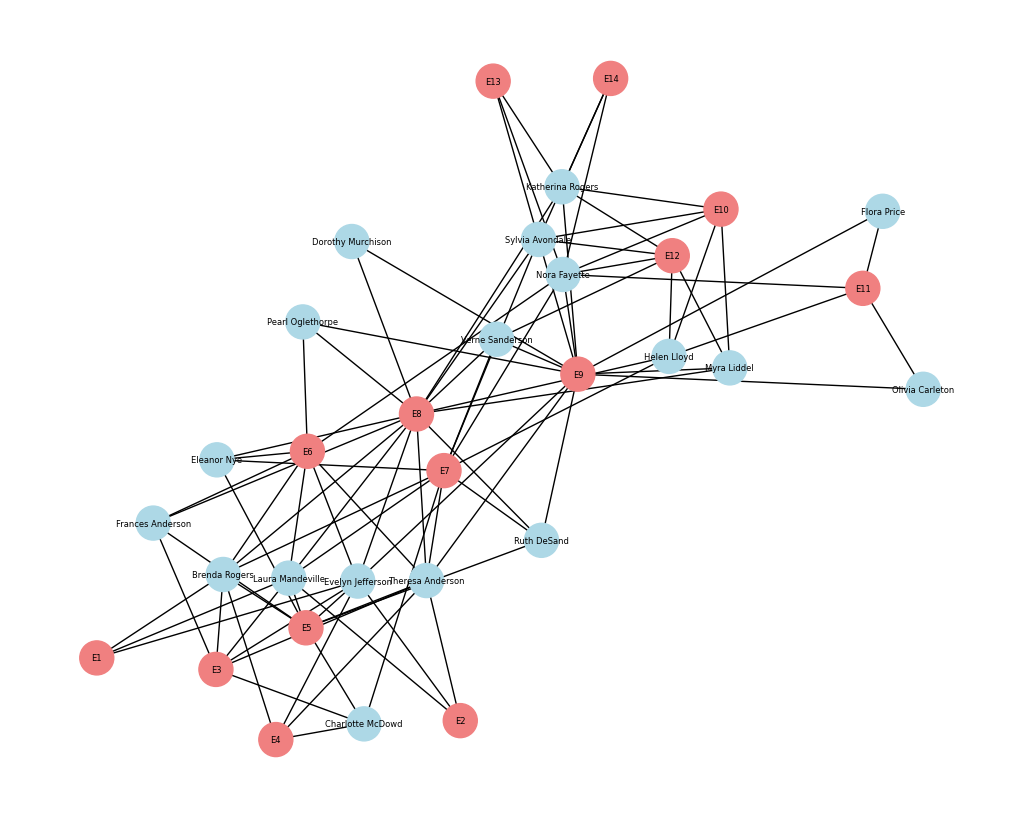

In [28]:
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=["lightblue" if n in women else "lightcoral" for n in G.nodes()],
    node_size=600,
    font_size=6
)
plt.show()


 To understand the importance of each event, we can aggregate the number of edges connecting to each event node (degree). This provides insight into which events were the most popular and had the highest attendance, as well as which ones attracted the fewest participants. Similarly, by examining the edges connected to each woman node, we can determine how many events each woman attended and assess her level of participation within the social network.

In [29]:


#  Event DataFrame: each event and number of attendees
event_data = [(event, G.degree(event)) for event in clubs]
df_events = pd.DataFrame(event_data, columns=["Event", "Attendees"])
df_events = df_events.sort_values(by="Attendees", ascending=False).reset_index(drop=True)

# 2 Woman DataFrame: each woman and number of events attended
woman_data = [(woman, G.degree(woman)) for woman in women]
df_women_events = pd.DataFrame(woman_data, columns=["Member", "Events_Attended"])
df_women_events = df_women_events.sort_values(by="Events_Attended", ascending=False).reset_index(drop=True)

# Display the DataFrames
print("Event Attendance Summary:")
display(df_events)




Event Attendance Summary:


,Event,Attendees
0,E8,14
1,E9,12
2,E7,10
3,E5,8
4,E6,8
5,E3,6
6,E12,6
7,E10,5
8,E4,4
9,E11,4


In [30]:
print("\nWomen Event Participation Summary:")
display(df_women_events)


Women Event Participation Summary:


,Member,Events_Attended
0,Evelyn Jefferson,8
1,Theresa Anderson,8
2,Nora Fayette,8
3,Laura Mandeville,7
4,Brenda Rogers,7
5,Sylvia Avondale,7
6,Katherina Rogers,6
7,Helen Lloyd,5
8,Myra Liddel,4
9,Verne Sanderson,4


Event 8 is highlighted in red, its attendees are shown in light blue, and non-attendees appear in gray. This event turned out to be the most popular, with 14 participants. We can see that the women who did not attend also tend to have the fewest connections to other members, both in terms of total and weighted relationships. This suggests that not only the number of events attended matters, but also the number of shared events with other members. Therefore, the most popular events should be prioritized in the future, as they play a key role in strengthening social connections across the network.


Women who attended E8:
['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Helen Lloyd', 'Dorothy Murchison']


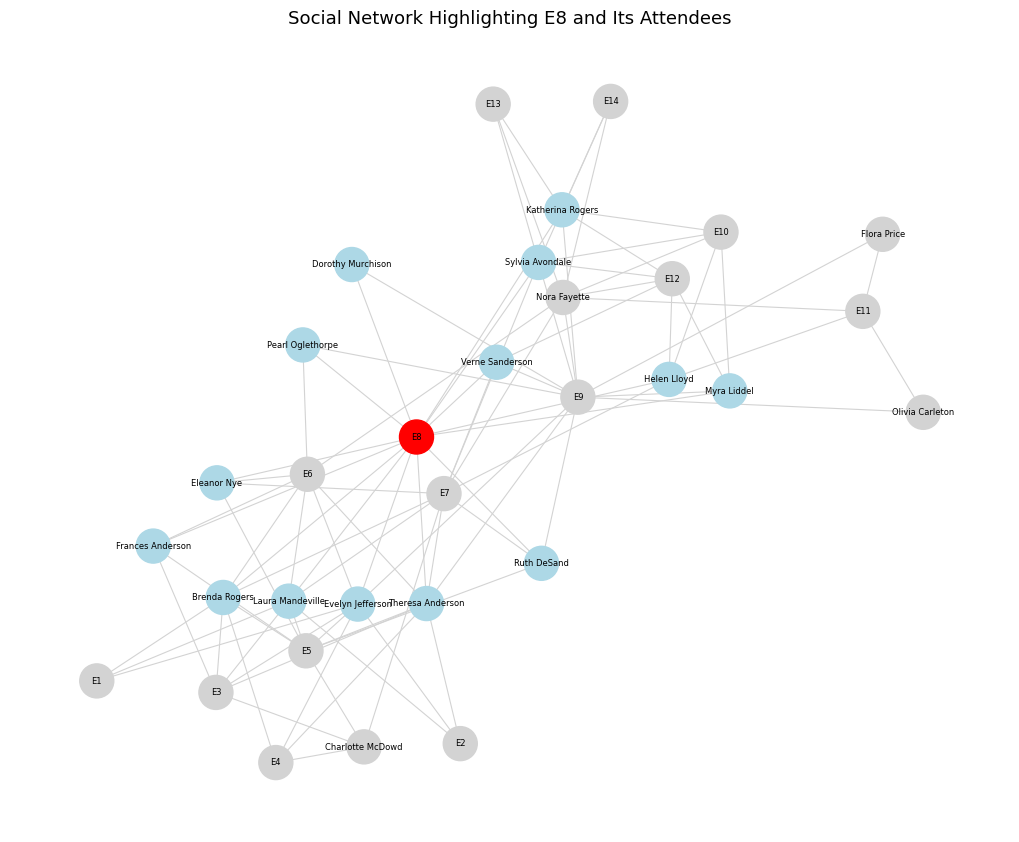

In [35]:
# Define target event 
try:
    event_index = int(input("Enter an event number between 0 and 13: "))
    if event_index < 0 or event_index > 13:
        raise ValueError("Event number out of range.")
except ValueError as e:
    print(f"Invalid input: {e}")
else:
    target_event = clubs[event_index] 

    # Get the women who attended this event
    attendees = list(G.neighbors(target_event))

    print(f"\nWomen who attended {target_event}:")
    print(attendees)

    # Set up network layout
    pos = nx.spring_layout(G, seed=648)

    # Color nodes: selected event = red, attendees = lightblue, others = gray
    node_colors = []
    for node in G.nodes():
        if node == target_event:
            node_colors.append("red")          # Highlight selected event
        elif node in attendees:
            node_colors.append("lightblue")    # Attendees
        else:
            node_colors.append("lightgray")    # Others

    # Draw the network
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=600,
        font_size=6,
        edge_color="lightgray",
        width=0.8
    )
    plt.title(f"Social Network Highlighting {target_event} and Its Attendees", fontsize=13)
    plt.show()



In [34]:
# Calculate different centrality measures
degree_centrality = nx.degree_centrality(W)
betweenness_centrality = nx.betweenness_centrality(W, normalized=True)
closeness_centrality = nx.closeness_centrality(W)
eigenvector_centrality = nx.eigenvector_centrality(W, max_iter=500)

# Combine into one DataFrame
centrality_df = pd.DataFrame({
    "Member": list(degree_centrality.keys()),
    "Degree_Centrality": degree_centrality.values(),
    "Betweenness": betweenness_centrality.values(),
    "Closeness": closeness_centrality.values(),
    "Eigenvector": eigenvector_centrality.values()
})

# Sort by one measure (e.g., eigenvector)
centrality_df = centrality_df.sort_values(by="Eigenvector", ascending=False).reset_index(drop=True)
display(centrality_df)

,Member,Degree_Centrality,Betweenness,Closeness,Eigenvector
0,Evelyn Jefferson,1.000000,0.010122,1.000000,0.253524
1,Theresa Anderson,1.000000,0.010122,1.000000,0.253524
2,Ruth DeSand,1.000000,0.010122,1.000000,0.253524
3,Helen Lloyd,1.000000,0.010122,1.000000,0.253524
4,Nora Fayette,1.000000,0.010122,1.000000,0.253524
5,Sylvia Avondale,1.000000,0.010122,1.000000,0.253524
6,Verne Sanderson,1.000000,0.010122,1.000000,0.253524
7,Pearl Oglethorpe,0.941176,0.005348,0.944444,0.243157
8,Myra Liddel,0.941176,0.005348,0.944444,0.243157
9,Katherina Rogers,0.941176,0.005348,0.944444,0.243157


The uniformity in top degree and closeness scores suggests a dense, well-integrated social structure among core members, where women like Evelyn Jefferson and Theresa Anderson act as central connectors participating in nearly all shared events. In contrast, the lower eigenvector and betweenness scores among peripheral members such as Charlotte McDowd and Flora Price indicate limited structural influence, they are loosely tied to the network’s core, contributing little to information flow or group cohesion despite occasional participation.